## Unbiased underdamped case
The probability densities to find a particle at position $x$ with velocity $v$ and direction $e_i=\pm 1$ are denoted as $f_\pm(x, v,t)$, which evolve according to
$$
\begin{aligned}
\partial_t f_+ + \partial_x (vf_+) - \gamma \partial_v [(v-u)f_+] &= \gamma^2 D \partial_v^2 f_+ - \alpha (f_+ - f_-), \\
\partial_t f_- - \partial_x (vf_-) - \gamma \partial_v [(v-u)f_-] &= \gamma^2 D \partial_v^2 f_- + \alpha (f_+ - f_-).
\end{aligned}
$$

Denoting the first three moments in $v$ as $\rho^\pm$, $w^\pm$, $S^\pm$, we get the equations
$$
\begin{aligned}
\partial \rho^\pm &= \mp \partial_x w^\pm \mp \alpha(\rho^+-\rho^-), \\
\partial w^\pm &= \mp \partial_x S^\pm -\gamma (w^\pm -  u\rho^\pm) \mp \alpha(w^+-w^-), \\
\partial S^\pm &= - 2\gamma(S^\pm-uw^\pm) + 2 \gamma^2 D \rho^\pm \mp \alpha(S^+-S_-).
\end{aligned}
$$ 

For $\alpha=0$, we get
$$
\begin{aligned}
\partial \rho^\pm &= \mp \partial_x w^\pm, \\
\partial w^\pm &= \mp \partial_x S^\pm -\gamma (w^\pm -  u\rho^\pm), \\
\partial S^\pm &= - 2\gamma(S^\pm-uw^\pm) + 2 \gamma^2 D \rho^\pm.
\end{aligned}
$$ 

Expanding the above equations around the homogenous state
$$
\rho^\pm = \rho^\pm_0,\quad w^\pm = w_0^\pm = u_0 \rho_0^\pm, \quad S^\pm = S^\pm_0 =u_0^2\rho^\pm_0,
$$
where $u_0=u(\rho_0)$ and $\rho_0=\rho_0^++\rho_0^-$, we find

$$
\begin{aligned}
\partial_t \delta \rho^\pm &=\mp \partial_x \delta w^\pm, \\
\partial_t \delta w^\pm &= \mp \partial_x \delta S^\pm - \gamma \delta w^\pm +\gamma (u_0 + u'\rho_0^\pm)\delta \rho^\pm + \gamma u' \rho_0^\pm\delta \rho^\mp,\\
\partial_t \delta S^\pm &= -2 \gamma \delta S^\pm + 2\gamma u_0\delta w^\pm + 2\gamma w_0^\pm (\delta \rho^\pm +\delta\rho^\mp) + 2\gamma^2 D\delta \rho^\pm, \\
&=-2 \gamma \delta S^\pm + 2\gamma u_0\delta w^\pm + 2\gamma (w_0^\pm + \gamma D)\delta \rho^\pm + 2\gamma w_0^\pm \delta\rho^\mp.
\end{aligned}
$$

$$
M=\begin{pmatrix}
0 & -iq & 0 & 0 & 0 & 0 \\
\gamma(u_0 + u' \rho_0^+) & -\gamma & -iq & \gamma u' \rho_0^+ & 0 & 0 \\
2\gamma(w_0^+ + \gamma D) & 2 \gamma u_0 & -2\gamma & 2\gamma w_0^+ & 0 & 0 \\
0 & 0 & 0 & 0 & iq & 0 \\
\gamma u' \rho_0^- & 0 & 0 & \gamma(u_0+u' \rho_0^-) & -\gamma & iq \\
2\gamma w_0^- & 0 & 0 & 2\gamma(w_0^- + \gamma D) & 2\gamma u_0 & -2\gamma
\end{pmatrix}
$$

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import schur

class DMatrix2:
    def __init__(self, gamma, u_prime, D, rho0_plus, u0=1, rho0=1):
        self.gamma = gamma
        self.u_prime = u_prime
        self.D = D
        self.u0 = u0
        self.rho0_p = rho0_plus
        self.rho0_m = rho0 - rho0_plus
        self.w0_p = self.rho0_p * u0
        self.w0_m = self.rho0_m * u0
        self.rho0 = rho0
        self.w0_bar = -u0 * rho0

    def get_M(self, q):
        M = np.zeros((4, 4), complex)
        M[0, 1] = -1j * q
        M[1, 0] = -1j * q * (self.w0_p * self.u_prime + self.gamma * self.D) + self.gamma * (self.rho0_p * self.u_prime + self.u0)
        M[1, 1] = -1j * q * self.u0 - self.gamma
        M[1, 2] = -1j * q * self.w0_p * self.u_prime + self.gamma * self.rho0_p * self.u_prime
        M[2, 3] = 1j * q
        M[3, 0] = 1j * q * self.w0_m * self.u_prime + self.gamma * self.rho0_m * self.u_prime
        M[3, 2] = 1j * q * (self.w0_m * self.u_prime + self.gamma * self.D) + self.gamma * (self.rho0_m * self.u_prime + self.u0)
        M[3, 3] = 1j * q * self.u0 - self.gamma
        return M
    
    def get_lambda(self, q):
        T, Z = schur(self.get_M(q), output="complex")
        eigen_values = np.array([T[0, 0], T[1, 1], T[2, 2], T[3, 3]])
        return eigen_values
    
    def get_lambda_q(self, q_arr):
        lambda_arr = np.array([self.get_lambda(q) for q in q_arr])
        return lambda_arr
    
    def get_max_lambda(self, q_arr):
        lambda_arr = self.get_lambda_q(q_arr)
        max_lambda = lambda_arr.max(axis=1)
        return max_lambda.max()
    
    def get_lambda_max_lambda_q0(self, q_arr):
        lambda_arr = self.get_lambda_q(q_arr)
        max_lambda = lambda_arr.max(axis=1)
        return max_lambda.max(), max_lambda[0].real

    def get_lambda_max_Re_Im_q0(self, q_arr):
        lambda_arr = self.get_lambda_q(q_arr).max(axis=1)
        max_Re_idx = lambda_arr.real.argmax()
        max_Im_idx = np.abs(lambda_arr.imag).argmax()
        max_Re = lambda_arr[max_Re_idx].real
        if lambda_arr[max_Im_idx].real > 0:
            max_Im = np.abs(lambda_arr[max_Im_idx].imag)
        else:
            max_Im = np.abs(lambda_arr[max_Re_idx].imag)
        return max_Re, max_Im, lambda_arr[0].real


[-2.00044923e+01+0.19983728j -2.00044923e+01-0.19983728j
 -9.99400748e+00-0.09980539j -9.99400748e+00+0.09980539j
 -1.50018739e-03-0.10002627j -1.50018739e-03+0.10002627j]
[-9.9999997e-04-1.00010002e-01j -9.9990000e+00+1.00020001e-05j
 -9.9999997e-04+1.00010002e-01j -9.9990000e+00-1.00020001e-05j]


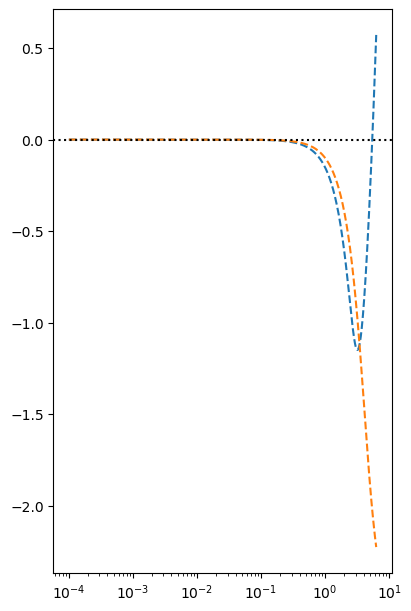

In [49]:
class DMatrix3:
    def __init__(self, gamma, u_prime, D, rho0_plus, u0=1, rho0=1):
        self.gamma = gamma
        self.u_prime = u_prime
        self.D = D
        self.u0 = u0
        self.rho0_p = rho0_plus
        self.rho0_m = rho0 - rho0_plus
        self.w0_p = self.rho0_p * u0
        self.w0_m = self.rho0_m * u0
        self.S0_p = self.w0_p * self.u0
        self.S0_m = self.w0_m * self.u0
        self.rho0 = rho0
        self.w0_bar = -u0 * rho0

    def get_M(self, q):
        M = np.zeros((6, 6), complex)
        M[0, 1] = -1j * q
        M[1, 0] = self.gamma * (self.u0 + self.u_prime * self.rho0_p)
        M[1, 1] = -self.gamma
        M[1, 2] = -1j * q
        M[1, 3] = self.gamma * self.u_prime * self.rho0_p
        M[2, 0] = 2 * self.gamma * (self.w0_p + self.gamma * self.D)
        M[2, 1] = 2 * self.gamma * self.u0
        M[2, 2] = -2 * self.gamma
        M[2, 3] = 2 * self.gamma * self.w0_p

        M[3, 4] = 1j * q
        M[4, 0] = self.gamma * self.u_prime * self.rho0_m
        M[4, 3] = self.gamma * (self.u0 + self.u_prime * self.rho0_m)
        M[4, 4] = -self.gamma
        M[4, 5] = 1j * q
        M[5, 0] = 2 * self.gamma * self.w0_m
        M[5, 3] = 2 * self.gamma * (self.w0_m + self.gamma * self.D)
        M[5, 4] = 2 * self.gamma * self.u0
        M[5, 5] = -2 * self.gamma
        return M
    
    def get_lambda(self, q):
        T, Z = schur(self.get_M(q), output="complex")
        eigen_values = np.array([T[0, 0], T[1, 1], T[2, 2], T[3, 3], T[4, 4], T[5, 5]])
        return eigen_values
    
    def get_lambda_q(self, q_arr):
        lambda_arr = np.array([self.get_lambda(q) for q in q_arr])
        return lambda_arr
    
    def get_max_lambda(self, q_arr):
        lambda_arr = self.get_lambda_q(q_arr)
        max_lambda = lambda_arr.max(axis=1)
        return max_lambda.max()
    
    def get_lambda_max_lambda_q0(self, q_arr):
        lambda_arr = self.get_lambda_q(q_arr)
        max_lambda = lambda_arr.max(axis=1)
        return max_lambda.max(), max_lambda[0].real

    def get_lambda_max_Re_Im_q0(self, q_arr):
        lambda_arr = self.get_lambda_q(q_arr).max(axis=1)
        max_Re_idx = lambda_arr.real.argmax()
        max_Im_idx = np.abs(lambda_arr.imag).argmax()
        max_Re = lambda_arr[max_Re_idx].real
        if lambda_arr[max_Im_idx].real > 0:
            max_Im = np.abs(lambda_arr[max_Im_idx].imag)
        else:
            max_Im = np.abs(lambda_arr[max_Re_idx].imag)
        return max_Re, max_Im, lambda_arr[0].real


gamma = 10
u_prime = 0
D = 0.1
rho0_plus = 0.5

M = DMatrix3(gamma, u_prime, D, rho0_plus)
print(M.get_lambda(0.1))

q_arr = np.logspace(-4, np.log10(np.pi*2), 1000)
sigma = M.get_lambda_q(q_arr).max(axis=1)
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(4, 6), constrained_layout=True, sharex=True)
mask = np.abs(sigma.imag) < 1e-8
line, = ax1.plot(q_arr[mask], sigma.real[mask])
mask = np.abs(sigma.imag) >= 1e-8
ax1.plot(q_arr[mask], sigma.real[mask], '--', c=line.get_c())

M = DMatrix2(gamma, u_prime, D, rho0_plus)
print(M.get_lambda(0.1))

q_arr = np.logspace(-4, np.log10(np.pi*2), 1000)
sigma = M.get_lambda_q(q_arr).max(axis=1)
mask = np.abs(sigma.imag) < 1e-8
line, = ax1.plot(q_arr[mask], sigma.real[mask])
mask = np.abs(sigma.imag) >= 1e-8
ax1.plot(q_arr[mask], sigma.real[mask], '--', c=line.get_c())

ax1.set_xscale("log")
# ax1.set_yscale("log")

ax1.axhline(0, c="k", linestyle=":")

plt.show()
plt.close()